<a href="https://colab.research.google.com/github/sowmyalikkyy/Machine_Learning/blob/master/KNN_20176019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
import numpy
import math
import operator

In [2]:
from google.colab import files
uploaded = files.upload()

Saving testProdSelection.arff to testProdSelection.arff
Saving trainProdSelection.arff to trainProdSelection.arff


In [0]:
train=arff.loadarff("trainProdSelection.arff")

test=arff.loadarff("testProdSelection.arff")

In [0]:
trainingDF = pd.DataFrame(train[0])
testingDF = pd.DataFrame(test[0])

In [5]:
trainingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 7 columns):
Type         186 non-null object
LifeStyle    186 non-null object
Vacation     186 non-null float64
eCredit      186 non-null float64
salary       186 non-null float64
property     186 non-null float64
label        186 non-null object
dtypes: float64(4), object(3)
memory usage: 10.2+ KB


In [6]:
trainingDF.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,b'student',b'spend>saving',6.0,40.0,13.62,3.2804,b'C1'
1,b'student',b'spend>saving',11.0,21.0,15.32,2.0232,b'C1'
2,b'student',b'spend>saving',7.0,64.0,16.55,3.1202,b'C1'
3,b'student',b'spend>saving',3.0,47.0,15.71,3.4022,b'C1'
4,b'student',b'spend>saving',15.0,10.0,16.96,2.2825,b'C1'


In [0]:
trainingDF.Type=trainingDF.Type.str.decode("UTF-8")

In [0]:
trainingDF.LifeStyle=trainingDF.LifeStyle.str.decode("UTF-8")

In [0]:
trainingDF.label=trainingDF.label.str.decode("UTF-8")

In [10]:
trainingDF.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend>saving,6.0,40.0,13.62,3.2804,C1
1,student,spend>saving,11.0,21.0,15.32,2.0232,C1
2,student,spend>saving,7.0,64.0,16.55,3.1202,C1
3,student,spend>saving,3.0,47.0,15.71,3.4022,C1
4,student,spend>saving,15.0,10.0,16.96,2.2825,C1


In [0]:
minVal=trainingDF.Vacation.min()
maxVal=trainingDF.Vacation.max()
trainingDF.Vacation=trainingDF.Vacation.apply(lambda x:(x-minVal)/(maxVal-minVal))


In [0]:
minVal=trainingDF.eCredit.min()
maxVal=trainingDF.eCredit.max()
trainingDF.eCredit=trainingDF.eCredit.apply(lambda x:(x-minVal)/(maxVal-minVal))

In [0]:
minVal=trainingDF.salary.min()
maxVal=trainingDF.salary.max()
trainingDF.salary=trainingDF.salary.apply(lambda x:(x-minVal)/(maxVal-minVal))

minVal=trainingDF.property.min()
maxVal=trainingDF.property.max()
trainingDF.property=trainingDF.property.apply(lambda x:(x-minVal)/(maxVal-minVal))

In [14]:
trainingDF.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend>saving,0.079365,0.107558,0.219960,0.183167,C1
1,student,spend>saving,0.158730,0.052326,0.293102,0.112797,C1
2,student,spend>saving,0.095238,0.177326,0.346023,0.174200,C1
3,student,spend>saving,0.031746,0.127907,0.309882,0.189984,C1
4,student,spend>saving,0.222222,0.020349,0.363663,0.127311,C1


In [0]:
testingDF.Type=testingDF.Type.str.decode("UTF-8")

In [0]:
testingDF.LifeStyle=testingDF.LifeStyle.str.decode("UTF-8")

In [0]:
testingDF.label=testingDF.label.str.decode("UTF-8")

In [0]:
minVal=testingDF.Vacation.min()
maxVal=testingDF.Vacation.max()
testingDF.Vacation=testingDF.Vacation.apply(lambda x:(x-minVal)/(maxVal-minVal))


In [0]:
minVal=testingDF.eCredit.min()
maxVal=testingDF.eCredit.max()
testingDF.eCredit=testingDF.eCredit.apply(lambda x:(x-minVal)/(maxVal-minVal))

In [0]:
minVal=testingDF.salary.min()
maxVal=testingDF.salary.max()
testingDF.salary=testingDF.salary.apply(lambda x:(x-minVal)/(maxVal-minVal))

In [0]:
minVal=testingDF.property.min()
maxVal=testingDF.property.max()
testingDF.property=testingDF.property.apply(lambda x:(x-minVal)/(maxVal-minVal))

In [22]:
testingDF.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend<saving,0.20,0.058824,0.104637,0.398926,C1
1,student,spend>>saving,0.54,0.021008,0.175059,0.243041,C1
2,student,spend<<saving,0.52,0.231092,0.138339,0.085992,C1
3,engineer,spend>saving,0.26,0.151261,0.430086,0.116229,C1
4,librarian,spend<saving,0.00,0.016807,0.352657,0.025714,C1


In [0]:
trainingDF = pd.concat([trainingDF,pd.get_dummies(trainingDF['Type'], prefix='Type')],axis=1)
trainingDF = pd.concat([trainingDF,pd.get_dummies(trainingDF['LifeStyle'], prefix='Type')],axis=1)
trainingDF.drop(['Type'],axis=1, inplace=True)
trainingDF.drop(['LifeStyle'],axis=1, inplace=True)

In [24]:
outcol=trainingDF['label']
trainingDF.drop(['label'],axis=1,inplace=True)
trainingDF['label']=outcol
trainingDF.head()

,Vacation,eCredit,salary,property,Type_doctor,Type_engineer,Type_librarian,Type_professor,Type_student,Type_spend<<saving,Type_spend<saving,Type_spend>>saving,Type_spend>saving,label
0,0.079365,0.107558,0.219960,0.183167,0,0,0,0,1,0,0,0,1,C1
1,0.158730,0.052326,0.293102,0.112797,0,0,0,0,1,0,0,0,1,C1
2,0.095238,0.177326,0.346023,0.174200,0,0,0,0,1,0,0,0,1,C1
3,0.031746,0.127907,0.309882,0.189984,0,0,0,0,1,0,0,0,1,C1
4,0.222222,0.020349,0.363663,0.127311,0,0,0,0,1,0,0,0,1,C1


In [25]:
testingDF.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend<saving,0.20,0.058824,0.104637,0.398926,C1
1,student,spend>>saving,0.54,0.021008,0.175059,0.243041,C1
2,student,spend<<saving,0.52,0.231092,0.138339,0.085992,C1
3,engineer,spend>saving,0.26,0.151261,0.430086,0.116229,C1
4,librarian,spend<saving,0.00,0.016807,0.352657,0.025714,C1


In [0]:
testingDF = pd.concat([testingDF,pd.get_dummies(testingDF['Type'], prefix='Type')],axis=1)
testingDF = pd.concat([testingDF,pd.get_dummies(testingDF['LifeStyle'], prefix='Type')],axis=1)
testingDF.drop(['Type'],axis=1, inplace=True)
testingDF.drop(['LifeStyle'],axis=1, inplace=True)

In [27]:
outcol=testingDF['label']
testingDF.drop(['label'],axis=1,inplace=True)
testingDF['label']=outcol
testingDF.head()

,Vacation,eCredit,salary,property,Type_doctor,Type_engineer,Type_librarian,Type_professor,Type_student,Type_spend<<saving,Type_spend<saving,Type_spend>>saving,Type_spend>saving,label
0,0.20,0.058824,0.104637,0.398926,0,0,0,0,1,0,1,0,0,C1
1,0.54,0.021008,0.175059,0.243041,0,0,0,0,1,0,0,1,0,C1
2,0.52,0.231092,0.138339,0.085992,0,0,0,0,1,1,0,0,0,C1
3,0.26,0.151261,0.430086,0.116229,0,1,0,0,0,0,0,0,1,C1
4,0.00,0.016807,0.352657,0.025714,0,0,1,0,0,0,1,0,0,C1


In [0]:
  def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(0,length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
  
  def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
 
  def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 
  def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


In [0]:
def knn(k):
    predictions=[]
    for x in range(len(testingDF)):
        neighbors = getNeighbors(trainingDF.values, testingDF.values[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
    accuracy = getAccuracy(testingDF.values, predictions)
    print('Accuracy: ' + repr(accuracy) + '%','with k=',k)
    return accuracy

In [30]:
acc_list=[]
k_list=[]
for i in range(1,100,2):
  acc_list.append(knn(i))
  k_list.append(i)

Accuracy: 23.809523809523807% with k= 1
Accuracy: 28.57142857142857% with k= 3
Accuracy: 28.57142857142857% with k= 5
Accuracy: 28.57142857142857% with k= 7
Accuracy: 23.809523809523807% with k= 9
Accuracy: 23.809523809523807% with k= 11
Accuracy: 19.047619047619047% with k= 13
Accuracy: 14.285714285714285% with k= 15
Accuracy: 19.047619047619047% with k= 17
Accuracy: 19.047619047619047% with k= 19
Accuracy: 19.047619047619047% with k= 21
Accuracy: 19.047619047619047% with k= 23
Accuracy: 19.047619047619047% with k= 25
Accuracy: 19.047619047619047% with k= 27
Accuracy: 19.047619047619047% with k= 29
Accuracy: 19.047619047619047% with k= 31
Accuracy: 19.047619047619047% with k= 33
Accuracy: 14.285714285714285% with k= 35
Accuracy: 14.285714285714285% with k= 37
Accuracy: 19.047619047619047% with k= 39
Accuracy: 19.047619047619047% with k= 41
Accuracy: 19.047619047619047% with k= 43
Accuracy: 19.047619047619047% with k= 45
Accuracy: 19.047619047619047% with k= 47
Accuracy: 19.04761904761

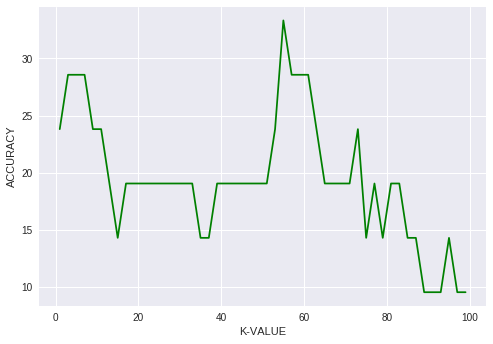

In [31]:
plt.plot(k_list,acc_list,color='green')
plt.xlabel('K-VALUE')
plt.ylabel('ACCURACY')
plt.grid(True)
plt.show()

In [0]:
TotalDF=pd.concat([trainingDF, testingDF], ignore_index=True)

In [33]:
TotalDF.head()

,Vacation,eCredit,salary,property,Type_doctor,Type_engineer,Type_librarian,Type_professor,Type_student,Type_spend<<saving,Type_spend<saving,Type_spend>>saving,Type_spend>saving,label
0,0.079365,0.107558,0.219960,0.183167,0,0,0,0,1,0,0,0,1,C1
1,0.158730,0.052326,0.293102,0.112797,0,0,0,0,1,0,0,0,1,C1
2,0.095238,0.177326,0.346023,0.174200,0,0,0,0,1,0,0,0,1,C1
3,0.031746,0.127907,0.309882,0.189984,0,0,0,0,1,0,0,0,1,C1
4,0.222222,0.020349,0.363663,0.127311,0,0,0,0,1,0,0,0,1,C1


In [34]:
knn(55)

Accuracy: 33.33333333333333% with k= 55


33.33333333333333